<a href="https://colab.research.google.com/github/KlaidasKaralevicius/Deep_Learning_Project_2.3/blob/main/cnn_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_hub as hub
import PIL.Image as Image
import matplotlib.pyplot as plt

<br><br>

---
#<font color='SeaGreen'>Chapter 1. If you don't have the model saved on disk yet, then we will create the model, train it and save it.</font>

>>*If you already have a model (saved_model_CIFAR10.zip) on disk then go to the next chapter*





###<font color='SeaGreen'>Step 1. Download and prepare the CIFAR10 dataset</font>

In [29]:

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



In [30]:
feature_extractor_model = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2"
IMAGE_SHAPE = (240, 240)
feature_extractor_layer = hub.KerasLayer( feature_extractor_model, input_shape=(IMAGE_SHAPE[0], IMAGE_SHAPE[1], 3),  trainable=False)

In [31]:
!pip install -q tf_keras

In [32]:
import tf_keras

num_classes = len(class_names)

resize = tf_keras.layers.Resizing(IMAGE_SHAPE[0], IMAGE_SHAPE[1])

model = tf_keras.Sequential([
  resize,
  feature_extractor_layer,
  tf_keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  metrics=['accuracy'])

In [33]:
'''
num_classes = len(class_names)

resize = tf.keras.layers.Resizing(IMAGE_SHAPE[0], IMAGE_SHAPE[1])

model = tf.keras.Sequential([
  resize,
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  metrics=['accuracy'])
'''

"\nnum_classes = len(class_names)\n\nresize = tf.keras.layers.Resizing(IMAGE_SHAPE[0], IMAGE_SHAPE[1])\n\nmodel = tf.keras.Sequential([\n  resize,\n  feature_extractor_layer,\n  tf.keras.layers.Dense(num_classes)\n])\n\nmodel.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  metrics=['accuracy'])\n"

In [34]:
model.build(input_shape=(None , 32, 32, 3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 240, 240, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              6931124   
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 6943934 (26.49 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 6931124 (26.44 MB)
_________________________________________________________________


## model.fit

In [35]:
history = model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))

1563/1563 [==============================] - 133s 78ms/step - loss: 0.4499 - accuracy: 0.8427 - val_loss: 0.3760 - val_accuracy: 0.8676


In [36]:
# after augment and learning rate reduce  0.9515           after 11  0.9089   after 8 epochs 0.9183   after 2 epochs accuracy: 0.877       after 5 epochs   0.91259

test_loss, test_acc = model.evaluate(test_images ,  test_labels  )
print(test_acc)

313/313 [==============================] - 20s 65ms/step - loss: 0.3760 - accuracy: 0.8676
0.8676000237464905


In [37]:
export_path = "saved_model_CIFAR10"
model.save(export_path)
!zip -r saved_model_CIFAR10.zip saved_model_CIFAR10


  adding: saved_model_CIFAR10/ (stored 0%)
  adding: saved_model_CIFAR10/fingerprint.pb (stored 0%)
  adding: saved_model_CIFAR10/assets/ (stored 0%)
  adding: saved_model_CIFAR10/keras_metadata.pb (deflated 81%)
  adding: saved_model_CIFAR10/variables/ (stored 0%)
  adding: saved_model_CIFAR10/variables/variables.index (deflated 80%)
  adding: saved_model_CIFAR10/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: saved_model_CIFAR10/saved_model.pb (deflated 91%)


<br><br>

---
###<font color='SeaGreen'>Let's plot the first 100 images </font>


In [38]:
'''img = train_images[4-1]
img = tf.expand_dims(img, axis=0)

result = model.predict(img)

predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class_name = class_names[predicted_class]
predicted_class_name'''

'img = train_images[4-1]\nimg = tf.expand_dims(img, axis=0)\n\nresult = model.predict(img)\n\npredicted_class = tf.math.argmax(result[0], axis=-1)\npredicted_class_name = class_names[predicted_class]\npredicted_class_name'

In [39]:
%%capture

predicted_class_name = [''] * 100

for i in range(100):
    img = tf.expand_dims(test_images[i], axis=0)
    result = model.predict(img);

    predicted_class = tf.math.argmax(result[0], axis=-1)
    predicted_class_name[i] = class_names[predicted_class]



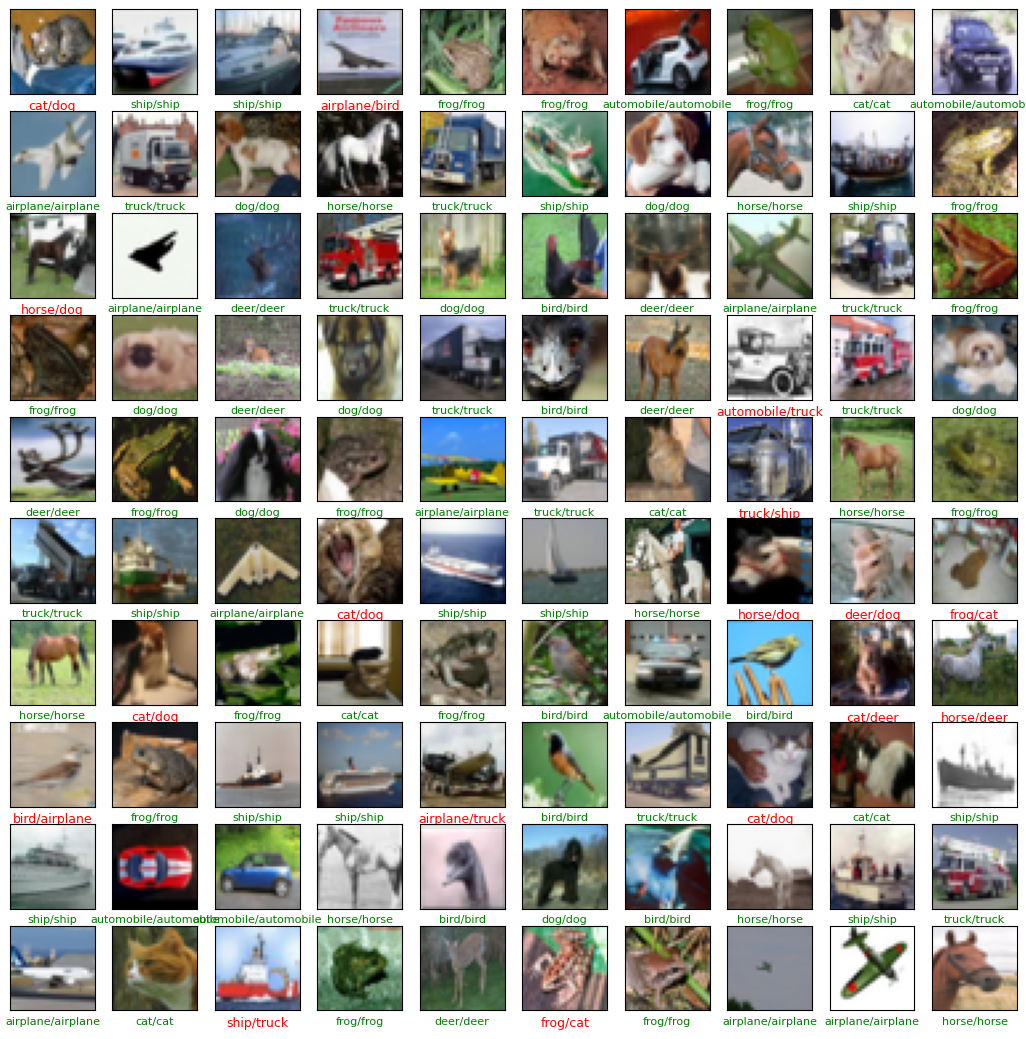

In [40]:

plt.figure(figsize=(13,13))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])

    if class_names[test_labels[i][0]]==predicted_class_name[i]:
      plt.xlabel(class_names[test_labels[i][0]]+'/'+predicted_class_name[i], color='green', fontsize=8)
    else:
      plt.xlabel(class_names[test_labels[i][0]]+'/'+predicted_class_name[i], color='red', fontsize=9)

plt.show()


<br><br><br><br>

---
#<font color='SeaGreen'>Chapter 2. Use data augmentation</font>



In [ ]:

# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# train_images, test_images = train_images / 255.0, test_images / 255.0
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [41]:
export_path = "saved_model_CIFAR10"
!unzip saved_model_CIFAR10.zip


Archive:  saved_model_CIFAR10.zip
replace saved_model_CIFAR10/fingerprint.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: saved_model_CIFAR10/fingerprint.pb  
replace saved_model_CIFAR10/keras_metadata.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: saved_model_CIFAR10/keras_metadata.pb  
replace saved_model_CIFAR10/variables/variables.index? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: saved_model_CIFAR10/variables/variables.index  
replace saved_model_CIFAR10/variables/variables.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: saved_model_CIFAR10/variables/variables.data-00000-of-00001  
replace saved_model_CIFAR10/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: saved_model_CIFAR10/saved_model.pb  


In [42]:
model = tf_keras.models.load_model(export_path)

model.trainable = True

!rm -r saved_model_CIFAR10
# !rm saved_model_CIFAR10.zip
!ls

sample_data  saved_model_CIFAR10.zip


In [46]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomBrightness(factor=0.1, value_range=(0, 1)),
  #tf.keras.layers.RandomHeight(factor=0.1),
  #tf.keras.layers.RandomWidth(factor=0.1),
  ##tf.keras.layers.RandomContrast(factor=0.1),
  tf.keras.layers.RandomTranslation(0.1, 0.1),
  #tf.keras.layers.RandomZoom(0.1, 0.1),
])

In [47]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_images=data_augmentation(train_images)

In [48]:
# 0.9537   0.9406
history = model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))

1563/1563 [==============================] - 131s 76ms/step - loss: 0.8010 - accuracy: 0.7184 - val_loss: 0.4275 - val_accuracy: 0.8529


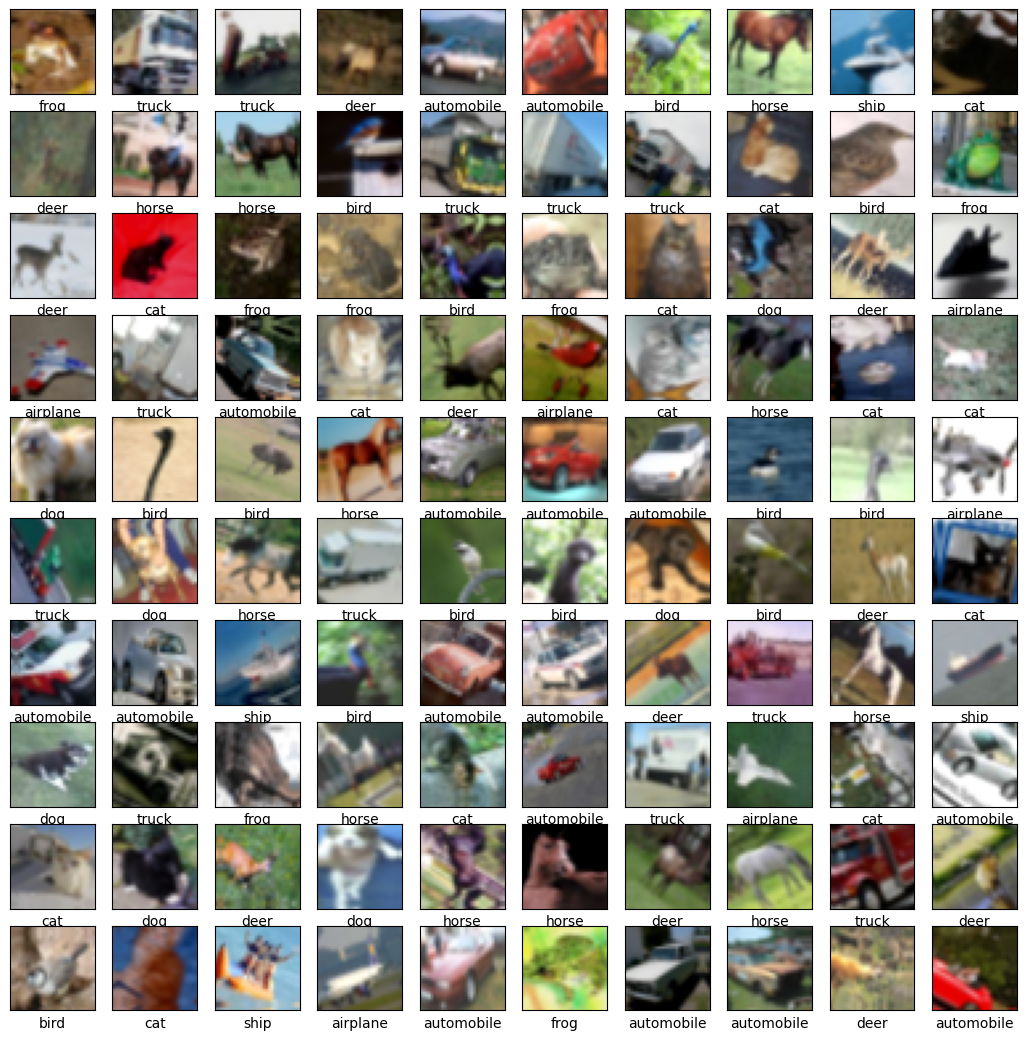

In [49]:

plt.figure(figsize=(13,13))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Chapter 3. Check data info

In [ ]:
 model.layers[2].trainable

True

In [ ]:
print(len(model.weights))
print(model.weights[57])


443
<tf.Variable 'efficientnetv2-b1/blocks_9/tpu_batch_normalization/beta:0' shape=(384,) dtype=float32, numpy=
array([ 6.91643804e-02,  6.81536615e-01,  8.71816456e-01,  2.09180188e+00,
       -1.20513014e-01, -1.44292188e+00, -3.77682149e-01,  9.95514810e-01,
       -7.54696503e-02,  1.71084738e+00,  9.80638564e-01,  1.30091202e+00,
        6.47561789e-01, -6.24314509e-02,  7.15203524e-01, -1.51085305e+00,
        1.05137587e+00,  7.47831821e-01, -1.61254871e+00, -8.82656723e-02,
        8.07817519e-01, -1.89381436e-01, -1.30040252e+00,  8.48712862e-01,
        1.60625648e+00,  4.22996372e-01, -9.72481966e-01,  5.98822534e-02,
        2.15416878e-01,  4.24745828e-02,  2.98648551e-02,  3.82486314e-01,
       -8.66762936e-01,  1.31333554e+00,  4.88786288e-02,  1.62681448e+00,
       -1.13823259e+00, -2.15501690e+00,  7.49236792e-02, -9.05199051e-01,
        1.48124054e-01, -8.73643637e-01,  1.27129585e-01, -1.65918604e-01,
        2.41206493e-04, -4.03847605e-01, -2.88199973e+00, -2.62

In [ ]:
for i, weights in enumerate(model.weights):
    print(i, weights.name)


0 efficientnetv2-b1/blocks_0/conv2d/kernel:0
1 efficientnetv2-b1/blocks_0/tpu_batch_normalization/gamma:0
2 efficientnetv2-b1/blocks_0/tpu_batch_normalization/beta:0
3 efficientnetv2-b1/blocks_1/conv2d/kernel:0
4 efficientnetv2-b1/blocks_1/tpu_batch_normalization/gamma:0
5 efficientnetv2-b1/blocks_1/tpu_batch_normalization/beta:0
6 efficientnetv2-b1/blocks_2/conv2d/kernel:0
7 efficientnetv2-b1/blocks_2/tpu_batch_normalization/gamma:0
8 efficientnetv2-b1/blocks_2/tpu_batch_normalization/beta:0
9 efficientnetv2-b1/blocks_2/conv2d_1/kernel:0
10 efficientnetv2-b1/blocks_2/tpu_batch_normalization_1/gamma:0
11 efficientnetv2-b1/blocks_2/tpu_batch_normalization_1/beta:0
12 efficientnetv2-b1/blocks_3/conv2d/kernel:0
13 efficientnetv2-b1/blocks_3/tpu_batch_normalization/gamma:0
14 efficientnetv2-b1/blocks_3/tpu_batch_normalization/beta:0
15 efficientnetv2-b1/blocks_3/conv2d_1/kernel:0
16 efficientnetv2-b1/blocks_3/tpu_batch_normalization_1/gamma:0
17 efficientnetv2-b1/blocks_3/tpu_batch_normali

In [ ]:
print("Number of layers in the base model: ", len( model.layers))

Number of layers in the base model:  3


In [ ]:
optimizer = model.optimizer
print(model.optimizer.lr)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [ ]:

new_lr = optimizer.lr * 0.1
optimizer.lr.assign(new_lr)
print(model.optimizer.lr)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.000100000005>
